# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats

import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

85

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
cities_found = []
clouds = []
country = []
humidity = []
max_temp = []
wind = []
lat = []
lon = []



url = "http://api.openweathermap.org/data/2.5/weather?"
print(f'''Beginning Data Retrieval     
-----------------------------''')

for city in cities:
#city = "hermanus"
    endpoint = f"{url}appid={weather_api_key}&units=Imperial&q={city}"
    response = requests.get(endpoint).json()

    try:
        print(f"Processing Record ID {response['id']} | {response['name']}")
        cities_found.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])        
        wind.append(response["wind"]["speed"])
        
    
    except:
        print(f"{city} not found. Skipping...")

    continue

print(f'''-----------------------------
Data Retrieval Complete      
-----------------------------
''')

Beginning Data Retrieval     
-----------------------------
Processing Record ID 986717 | Kruisfontein
Processing Record ID 3430863 | Mar del Plata
Processing Record ID 935215 | Saint-Philippe
Processing Record ID 2070998 | Geraldton
Processing Record ID 3660387 | Baláo
Processing Record ID 2163355 | Hobart
Processing Record ID 5855927 | Hilo
Processing Record ID 2264923 | Peniche
Processing Record ID 964432 | Port Alfred
Processing Record ID 962367 | Richards Bay
Processing Record ID 2641434 | Northam
Processing Record ID 3833367 | Ushuaia
Processing Record ID 3893726 | Constitución
Processing Record ID 6201424 | Mataura
Processing Record ID 4013679 | Coahuayana Viejo
barentsburg not found. Skipping...
Processing Record ID 3874787 | Punta Arenas
Processing Record ID 2145554 | Ulladulla
Processing Record ID 2057087 | Kupang
Processing Record ID 3996893 | Caborca
Processing Record ID 2264557 | Ponta do Sol
Processing Record ID 4021858 | Guerrero Negro
Processing Record ID 4032243 | Vain

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
wdf = pd.DataFrame({
    "City": cities_found,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Latitude": lat,
    "Longitude":lon
    
})

In [68]:
wdf.head()

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Kruisfontein,72.00,77,0,1.99,-34.00,24.73
1,Mar del Plata,52.00,87,0,4.70,-38.00,-57.56
2,Saint-Philippe,80.60,65,20,11.41,-21.36,55.77
3,Geraldton,75.20,47,0,17.22,-28.77,114.60
4,Baláo,71.69,89,100,6.40,-2.92,-79.82


In [69]:
wdf.count()

City          78
Max Temp      78
Humidity      78
Cloudiness    78
Wind Speed    78
Latitude      78
Longitude     78
dtype: int64

In [70]:
wdf.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

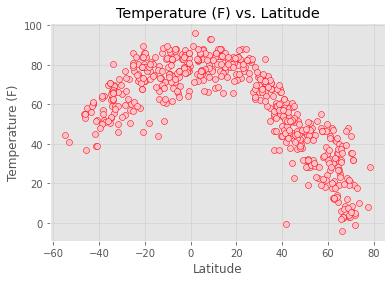

In [36]:
plt.scatter(lat,max_temp,edgecolors="red",facecolors="pink",)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("output_data/Temperature.png")
plt.style.use('ggplot')
plt.show()

#### Latitude vs. Humidity Plot

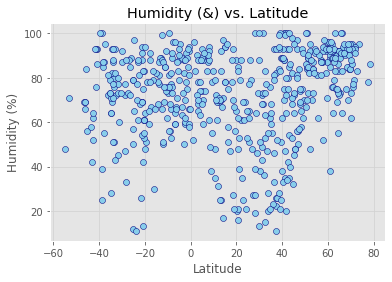

In [40]:
plt.scatter(lat,humidity,edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (&) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("output_data/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

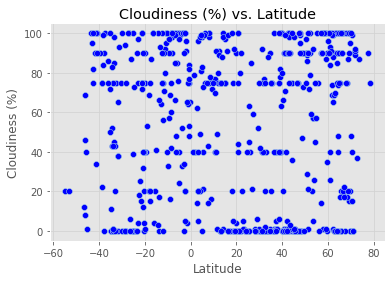

In [43]:
plt.scatter(lat,clouds,edgecolors="lightblue",facecolors="blue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("output_data/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

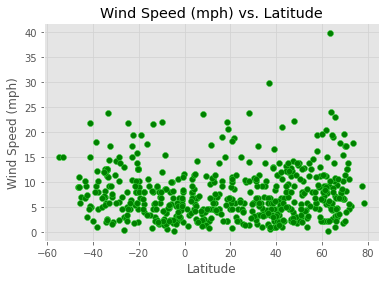

In [45]:
plt.scatter(lat,wind,edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.style.use('ggplot')
plt.savefig("output_data/Wind_Speed.png")
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern = wdf.loc[wdf["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = wdf.loc[wdf["Latitude"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

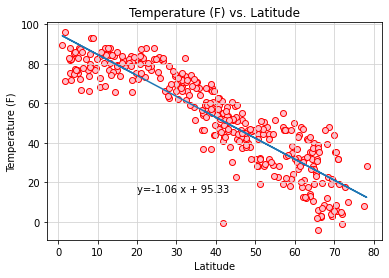

The r-squared is: -0.8973009856128848


In [25]:
plt.scatter(northern["Latitude"], northern["Max Temp"],edgecolors="red",facecolors="pink",)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Max Temp"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (20,15))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

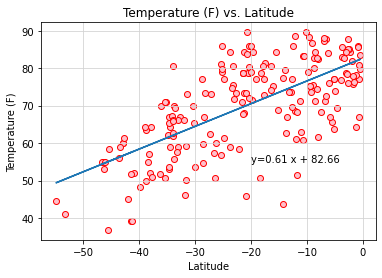

The r-squared is: 0.6713427085558934


In [27]:
plt.scatter(southern["Latitude"], southern["Max Temp"],edgecolors="red",facecolors="pink")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Max Temp"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-20,55))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

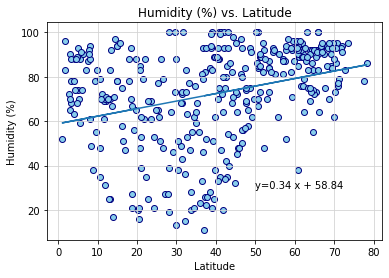

The r-squared is: 0.31609858870246843


In [28]:
plt.scatter(northern["Latitude"], northern["Humidity"],edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Humidity"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])



line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (50,30))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

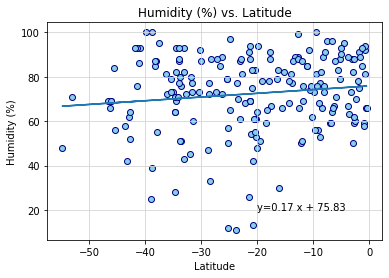

The r-squared is: 0.12864588751658218


In [30]:
plt.scatter(southern["Latitude"], southern["Humidity"],edgecolors="navy",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Humidity"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-20,20))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

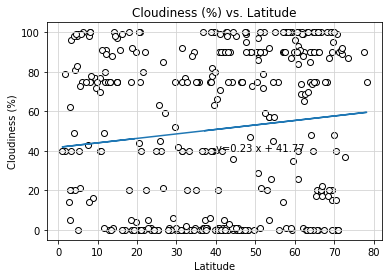

The r-squared is: 0.1164868329497246


In [31]:
plt.scatter(northern["Latitude"], northern["Cloudiness"],edgecolors="black",facecolors="white")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Cloudiness"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])



line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (40,40))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

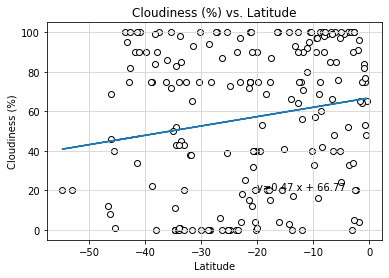

The r-squared is: 0.1752110397516029


In [32]:
plt.scatter(southern["Latitude"], southern["Cloudiness"],edgecolors="black",facecolors="white")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Cloudiness"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])


line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (-20,20))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

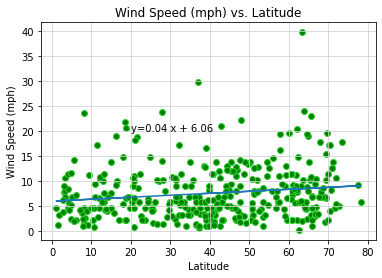

The r-squared is: 0.152072078354142


In [33]:
plt.scatter(northern["Latitude"], northern["Wind Speed"],edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.title(f"Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern["Latitude"], northern["Wind Speed"])
predict = slope * northern["Latitude"] + intercept
northern["predict"] = predict
plt.plot(northern["Latitude"], northern["predict"])

line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"


plt.annotate(line_eq, (20,20))
plt.show()

print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

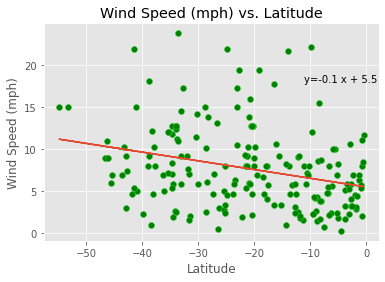

The r-squared is: -0.29018043444441183


In [56]:
plt.scatter(southern["Latitude"], southern["Wind Speed"],edgecolors="limegreen",facecolors="green")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="white")
plt.title(f"Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern["Latitude"], southern["Wind Speed"])
predict = slope * southern["Latitude"] + intercept
southern["predict"] = predict
plt.plot(southern["Latitude"], southern["predict"])

line_eq = f"y={round(slope,2)} x + {round(intercept,2)}"

plt.annotate(line_eq, (-11,18))
plt.show()

print(f"The r-squared is: {rvalue}")